In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv("C:\\Nevina Dalal\\GreyAtom\\Hackathon\\Train.csv")
test = pd.read_csv("C:\\Nevina Dalal\\GreyAtom\\Hackathon\\Test.csv")

In [4]:
#basic statistical description of the train data
train.describe()

,ID,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,cc_cons
count,15000.000000,15000.000000,15000.000000,6387.000000,7153.000000,5334.000000,13915.000000,14470.000000,14256.000000,6387.000000,...,1.352200e+04,14115.000000,14115.000000,1.352200e+04,1.405200e+04,1.432900e+04,14343.000000,14342.000000,1.432900e+04,15000.000000
mean,10032.077067,35.821400,556.877333,10923.114017,23528.110831,9118.916767,9.063600,9.493020,19.186518,5.285110,...,5.693594e+05,4.118030,14.028339,3.241828e+05,1.003265e+06,9.867396e+05,5.861954,16.176823,3.260935e+05,12268.175133
std,5760.372343,8.375531,192.645289,11056.411334,16522.533692,9933.749457,8.451949,9.062888,12.310610,6.198838,...,3.807421e+05,4.011986,11.533652,2.226731e+05,6.187201e+05,6.083321e+05,4.857434,13.648530,2.016090e+05,11847.712240
min,1.000000,22.000000,129.000000,15.615941,21.929843,31.457671,1.000000,1.000000,1.000000,1.000000,...,9.306745e+01,0.000000,0.000000,2.650332e+01,6.810641e+01,3.941829e+01,0.000000,0.000000,2.550365e+01,0.000000
25%,5060.500000,30.000000,450.750000,4832.873529,11160.115609,3923.840414,3.000000,3.000000,10.000000,1.000000,...,2.848119e+05,2.000000,6.000000,1.592213e+05,4.986986e+05,4.943571e+05,3.000000,6.000000,1.607323e+05,5435.000000
50%,10054.000000,34.000000,566.000000,9704.319537,22829.797859,7930.919138,7.000000,7.000000,18.000000,3.000000,...,5.652102e+05,3.000000,11.000000,3.219137e+05,1.004250e+06,9.741022e+05,5.000000,13.000000,3.233262e+05,10810.000000
75%,15015.250000,39.000000,710.000000,14710.421644,34492.057737,12004.033689,12.000000,13.000000,27.000000,7.000000,...,8.489730e+05,5.000000,19.000000,4.821599e+05,1.493722e+06,1.476865e+06,7.000000,22.000000,4.861349e+05,16394.000000
max,19998.000000,223.000000,977.000000,361712.821531,343536.313152,292828.344121,100.000000,130.000000,137.000000,62.000000,...,2.137043e+07,71.000000,171.000000,1.276041e+07,2.737828e+07,2.589564e+07,94.000000,162.000000,3.147874e+06,237021.000000


ID                         int64
account_type              object
gender                    object
age                        int64
region_code              float64
dc_cons_apr              float64
dc_cons_may              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may             float64
cc_count_jun             float64
dc_count_apr             float64
dc_count_may             float64
dc_count_jun             float64
card_lim                 float64
personal_loan_active     float64
vehicle_loan_active      float64
personal_loan_closed     float64
vehicle_loan_closed      float64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr         float64
max_credit_amount_apr    float64
debit_amount_may         float64
credit_amount_may        float64
credit_cou

In [16]:
train.isnull().sum()/train.shape[0] *100

ID                        0.000000
account_type              0.000000
gender                    0.000000
age                       0.000000
region_code               0.000000
dc_cons_apr              57.420000
dc_cons_may              52.313333
dc_cons_jun              64.440000
cc_count_apr              7.233333
cc_count_may              3.533333
cc_count_jun              4.960000
dc_count_apr             57.420000
dc_count_may             52.313333
dc_count_jun             47.400000
card_lim                  0.060000
personal_loan_active     91.606667
vehicle_loan_active      97.406667
personal_loan_closed     91.646667
vehicle_loan_closed      95.260000
investment_1             95.713333
investment_2             92.693333
investment_3             95.873333
investment_4             98.766667
debit_amount_apr          4.293333
credit_amount_apr         9.900000
debit_count_apr           5.006667
credit_count_apr          5.173333
max_credit_amount_apr     9.886667
debit_amount_may    

In [18]:
train['loan_enq'].fillna('N', inplace=True)
train['dc_count_apr'].fillna(0, inplace=True)
train.loc[train['dc_count_apr']==0, 'dc_cons_apr'] = 0
train['dc_count_may'].fillna(0, inplace=True)
train.loc[train['dc_count_may']==0, 'dc_cons_may'] = 0
train['dc_count_jun'].fillna(0, inplace=True)
train.loc[train['dc_count_jun']==0, 'dc_cons_jun'] = 0
train['cc_count_apr'].fillna(0, inplace=True)
train['cc_count_may'].fillna(0, inplace=True)
train['cc_count_jun'].fillna(0, inplace=True)
train[['credit_count_apr','credit_count_may','credit_count_jun']] = train[['credit_count_apr','credit_count_may','credit_count_jun']].fillna(0)
train.loc[train['credit_count_apr']==0, 'credit_amount_apr'] = 0
train.loc[train['credit_count_may']==0, 'credit_amount_may'] = 0
train.loc[train['credit_count_jun']==0, 'credit_amount_jun'] = 0

train[['debit_count_apr','debit_count_may','debit_count_jun']] = train[['debit_count_apr','debit_count_may','debit_count_jun']].fillna(0)
train.loc[train['debit_count_apr']==0, 'debit_amount_apr'] = 0
train.loc[train['debit_count_may']==0, 'debit_amount_may'] = 0
train.loc[train['debit_count_jun']==0, 'debit_amount_jun'] = 0

In [20]:
train
train.isnull().sum()/train.shape[0] *100

ID                        0.000000
account_type              0.000000
gender                    0.000000
age                       0.000000
region_code               0.000000
dc_cons_apr               0.000000
dc_cons_may               0.000000
dc_cons_jun              17.040000
cc_count_apr              0.000000
cc_count_may              0.000000
cc_count_jun              0.000000
dc_count_apr              0.000000
dc_count_may              0.000000
dc_count_jun              0.000000
card_lim                  0.060000
personal_loan_active     91.606667
vehicle_loan_active      97.406667
personal_loan_closed     91.646667
vehicle_loan_closed      95.260000
investment_1             95.713333
investment_2             92.693333
investment_3             95.873333
investment_4             98.766667
debit_amount_apr          0.313333
credit_amount_apr         0.053333
debit_count_apr           0.000000
credit_count_apr          0.000000
max_credit_amount_apr     9.886667
debit_amount_may    

In [22]:
# dropping columns with more than 90% null values
train.drop(columns=['investment_1','investment_2','investment_3','investment_4','personal_loan_active', 'vehicle_loan_active' ,'personal_loan_closed', 'vehicle_loan_closed'],axis=1,inplace=True)

In [24]:
train.isnull().sum()/train.shape[0] *100

ID                        0.000000
account_type              0.000000
gender                    0.000000
age                       0.000000
region_code               0.000000
dc_cons_apr               0.000000
dc_cons_may               0.000000
dc_cons_jun              17.040000
cc_count_apr              0.000000
cc_count_may              0.000000
cc_count_jun              0.000000
dc_count_apr              0.000000
dc_count_may              0.000000
dc_count_jun              0.000000
card_lim                  0.060000
debit_amount_apr          0.313333
credit_amount_apr         0.053333
debit_count_apr           0.000000
credit_count_apr          0.000000
max_credit_amount_apr     9.886667
debit_amount_may          0.000000
credit_amount_may         0.000000
credit_count_may          0.000000
debit_count_may           0.000000
max_credit_amount_may     9.853333
debit_amount_jun          2.526667
credit_amount_jun         0.000000
credit_count_jun          0.000000
debit_count_jun     

In [25]:
train.replace(np.nan,0,inplace= True)

In [26]:
train.isnull().sum()/train.shape[0] *100

ID                       0.0
account_type             0.0
gender                   0.0
age                      0.0
region_code              0.0
dc_cons_apr              0.0
dc_cons_may              0.0
dc_cons_jun              0.0
cc_count_apr             0.0
cc_count_may             0.0
cc_count_jun             0.0
dc_count_apr             0.0
dc_count_may             0.0
dc_count_jun             0.0
card_lim                 0.0
debit_amount_apr         0.0
credit_amount_apr        0.0
debit_count_apr          0.0
credit_count_apr         0.0
max_credit_amount_apr    0.0
debit_amount_may         0.0
credit_amount_may        0.0
credit_count_may         0.0
debit_count_may          0.0
max_credit_amount_may    0.0
debit_amount_jun         0.0
credit_amount_jun        0.0
credit_count_jun         0.0
debit_count_jun          0.0
max_credit_amount_jun    0.0
loan_enq                 0.0
cc_cons                  0.0
dtype: float64

In [50]:
X = train.drop(columns=['ID','cc_cons','region_code','account_type','gender','loan_enq'], axis=1)
y = train['cc_cons']
y = np.log1p(y)
X_cols = X.columns

In [47]:
X.skew()

age                       4.729273
dc_cons_apr               8.502713
dc_cons_may               2.989928
dc_cons_jun               9.270152
cc_count_apr              2.183395
cc_count_may              2.307842
cc_count_jun              1.128671
dc_count_apr              4.110398
dc_count_may              3.686235
dc_count_jun              3.413359
card_lim                  2.247355
debit_amount_apr         15.705703
credit_amount_apr        14.721122
debit_count_apr           1.612557
credit_count_apr          3.491067
max_credit_amount_apr    15.653080
debit_amount_may         18.903050
credit_amount_may         9.846954
credit_count_may          3.977170
debit_count_may           1.902203
max_credit_amount_may    11.078784
debit_amount_jun          4.466450
credit_amount_jun         4.240873
credit_count_jun          3.914746
debit_count_jun           1.825048
max_credit_amount_jun     1.325403
dtype: float64

In [51]:
X.columns

Index(['age', 'dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun'],
      dtype='object')

In [52]:
for col in X.columns:
    if skew(X[col]) > 1:
        X[col] = np.log1p(X[col])

In [53]:
X.skew()

age                      0.881504
dc_cons_apr              0.360232
dc_cons_may              0.144953
dc_cons_jun              0.661972
cc_count_apr            -0.259474
cc_count_may            -0.166865
cc_count_jun            -1.237124
dc_count_apr             1.204658
dc_count_may             1.000853
dc_count_jun             0.794214
card_lim                -1.551138
debit_amount_apr        -2.876201
credit_amount_apr       -2.392210
debit_count_apr         -0.820710
credit_count_apr        -0.035791
max_credit_amount_apr   -2.398792
debit_amount_may        -3.037074
credit_amount_may       -2.441352
credit_count_may        -0.019494
debit_count_may         -0.720712
max_credit_amount_may   -2.413303
debit_amount_jun        -2.632586
credit_amount_jun       -3.709469
credit_count_jun        -0.275972
debit_count_jun         -0.740865
max_credit_amount_jun   -3.582332
dtype: float64

ValueError: color kwarg must have one color per dataset

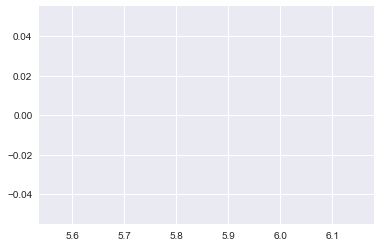

In [54]:

sns.distplot(X)